<a href="https://colab.research.google.com/github/Carocschall/CoderHouse/blob/main/Pre%20entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre entrega - Data Science II: Machine Learning para la Ciencia de Datos   - CODERHOUSE

Alumna: Carolina Cortez Schall

COMISION 60935

Tema: Calidad del vino


# Características de la composición del vino

***Resúmen***

La producción vitivinícola conlleva una serie de desafíos a tener en cuenta, frente al vertiginoso crecimiento de la comercialización y exportación de vinos de calidad. Por lo cual la calidad se constituye como el objeto de estudio frente a la satisfacción de necesidades y exigencias del público consumidor de vinos.
Es de común conocimiento que, la búsqueda de la calidad se relaciona directamente y proporcialmente con el valor económico que implica, así como la demanda que este provoca. El sujeto consumidor realiza una búsqueda y valoración de vinos de calidad, potenciando la exigencia, además de la experticia de quien consume desde un lugar de mayor conocimiento.
Por esto mismo, es menester la valoración y análisis frente a las característcias y componentes que son parte de la producción del vino, para el aseguramiento de la calidad del producto final de consumo.

***Objetivo***

El objetivo principal de este estudio es identificar y analizar las relaciones entre los niveles de acidez y la calidad del vino, para una mejora del producto final de consumo.

***Contexto Comercial***

El mercado vitivinícola se encuentra frente a un crecimiento constante a nivel mundial. La cultura popular y de disfrute en un entorno de experimentar los diversos placeres de la vida, lleva a un consumo mayor del vino como un producto de valor frente al disfrute y la salud.

Se trabaja con la información necesaria desde la categorización "calidad" de vinos y sus diversos componentes que intervienen en ella, modificándola en relación a su mejora o disminución de calidad del mismo.

***Desafío Comercial***

Conocer de qué manera influye los niveles de acidificación en la producción del vino para la obtención de un vino de mayor calidad.

***Preguntas de análisis***

1. ¿Cómo influye la la acidez en la calidad del vino?

2. ¿El ph del vino se relaciona directamente con la calidad del mismo?

3. ¿Qué tipo de acidez afecta más la calidad de vino?

4. La acidez del vino determina la graduación etílica?



***Hipótesis***

1. Tener una mayor acidez provoca mayor calidad del vino.

2. El ph del vino presenta relación con la calidad del vino.

3. El ácido cítrico tiene mayor impacto positivo en la mejora de la calidad del vino.

4. La graduación etílica se encuentra determinado por la acidez del vino.

# **Importaciones y Data Acquisition**

In [13]:
import requests
import pandas as pd

In [3]:
 # Generación de token como identificador único que se le da al usuario para poder realizar las solicitudes necesarias


response = requests.post('https://new.omixom.com/api/get_auth_token/', data = {"username": "coder","password": "hola1234"})
response.json()

{'token': '4b22137d75bb5437ebb6c1e18d2225fc91d6cbf5'}

In [21]:
#Importación de librerías para análisis
import pandas as pd
import numpy as np

#Archivo de datos
url='https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv'
df= pd.read_csv(url,sep=',', header=None)
df.head()

# Importación de librerias para visualizacion
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Importación de librerias para machine learning
from numpy import nan
from numpy import isnan
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.special import jv

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.svm import SVC

#para montar en drive
from google.colab import drive
import os


# **Descripción y conceptualización de variables**

**Variables incorporadas - Conceptualización**

0. ***Acidez Fija***

Conjunto de ácidos naturales del vino que ya hemos visto anteriormente (tartárico, málico, cítrico, succínico y láctico) (AF).

1. ***Acidez Volátil***

Cantidad de ácido acético del vino. La medida normal es de 0,3 a 0,6 gramos por litro. Cuanto menor acidez volátil tenga un vino mayor será la calidad (AV).

2. ***Acidez Cítrica***

Es el ácido menos común en el vino, produce una sensación de acidez muy fresca y brillante en el paladar (AC).

3. ***Azúcar Residual***

Es lo que queda después de que las uvas hayan pasado por el proceso de elaboración del vino (AR).

4. ***Cloruros***

Uno de los principales componentes de las sales en el vino son los cloruros, las sales minerales en el vino producen en organismo placer organoléptico, favorecen la hidratación, resalta sabores de los alimentos (mg/L.(CL).

5. ***Dióxido Sulfúrico Libre***

El SO2 se añade durante la elaboración del vino como conservante, lo que permite obtener vinos con menor oxidación al inhibir la reacción del oxígeno gracias a su capacidad reductora. Esto mejora las propiedades organolépticas del vino, realzando su sabor, color y aroma(DSL).

6. ***Dióxido Sulfúrico Total***

El Dióxido de azufre se usa para preservar el color, sabor y estabilidad del vino. Al ser un antimicrobiano, el SO2 interfiere con los caminos metabólicos de la levadura y bacterias (DST).

7. ***Densidad***

En los vinos, el azúcar se ha transformado en alcohol, cuya densidad es 0,798 (DEN).

8. ***Grado de acidez o alcalinidad***

La mayoría de los vinos tienen un valor de pH entre 3.0 y 4.0 (PH).

9. ***Sulfatos***

Los sulfitos del vino se utilizan para detener la fermentación en un punto específico del proceso de elaboración vinícola. Además, son conservantes que previenen el deterioro y la oxidación, y brindan protección contra las bacterias (SUL).

10. ***Alcohol***

En el caso de los vinos, cabe destacar que, según indica la legislación vigente, su graduación mínima será de 9% vol (ALC).

11. ***Calidad***

Combinación de los componentes anteriores (CAL).

12. ***Identificación***

Identificador del producto analizado en sus componentes (ID).

# **ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

Indagando en el dataframe, la base de datos presenta 1144 filas y 13 columnas.

In [22]:
# Tamaño de la base de datos
df.shape


(1144, 13)

Necesitamos indagar en la información sobre las columnas que presenta el DataFrame para iniciar en su exploración.

In [ ]:
# Columnas de la base de datos
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

Para identificar la posición de las variables y cualidades a analizar dentro del DataFrame, se realiza la consulta.

In [ ]:
# Nombres de las columnas a partir de la posición
df.iloc[0]

0            fixed acidity
1         volatile acidity
2              citric acid
3           residual sugar
4                chlorides
5      free sulfur dioxide
6     total sulfur dioxide
7                  density
8                       pH
9                sulphates
10                 alcohol
11                 quality
12                      Id
Name: 0, dtype: object

Se decide renombrar las columnas del DataFrame, colocando siglas identificatorias de las variables a analizar.

In [ ]:
# prompt: Con DataFrame df: df_archivo

df_archivo = df.rename(columns={0: 'AF', 1: 'AV', 2: 'AC', 3: 'AR', 4: 'CL', 5: 'DSL', 6: 'DST', 7: 'DEN', 8: 'PH', 9: 'SUL', 10: 'ALC', 11: 'CAL', 12: 'ID'})
df_archivo

,AF,AV,AC,AR,CL,DSL,DST,DEN,PH,SUL,ALC,CAL,ID
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1140,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1141,6.2,0.6,0.08,2.0,0.09,32.0,44.0,0.9949,3.45,0.58,10.5,5,1594
1142,5.9,0.55,0.1,2.2,0.062,39.0,51.0,0.9951200000000001,3.52,0.76,11.2,6,1595


Para conocer sobre el tipo de datos con los que se cuenta en el DataFrame, se utiliza el comando info.

In [ ]:
#Información sobre el tipo de datos de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1144 non-null   object
 1   1       1144 non-null   object
 2   2       1144 non-null   object
 3   3       1144 non-null   object
 4   4       1144 non-null   object
 5   5       1144 non-null   object
 6   6       1144 non-null   object
 7   7       1144 non-null   object
 8   8       1144 non-null   object
 9   9       1144 non-null   object
 10  10      1144 non-null   object
 11  11      1144 non-null   object
 12  12      1144 non-null   object
dtypes: object(13)
memory usage: 116.3+ KB


A partir de la información aportada, puede conocerse las 12 columnas con tipos de datos "object", los cuales transformaremos en "categóricos para un mejor cruce de los mismos y ahorrar memoria.

In [ ]:
# Conversión de columnas en tipo de datos categóricos
category_indexes = [0,1,2,3,4,5,6,7,8,9,10,11,12]
df[df.columns[category_indexes]] = df[df.columns[category_indexes]].astype('category')

Para consultar el resltado de la operación, realizamos la consulta pertinente.

In [ ]:
#Resultado del cambio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1144 non-null   category
 1   1       1144 non-null   category
 2   2       1144 non-null   category
 3   3       1144 non-null   category
 4   4       1144 non-null   category
 5   5       1144 non-null   category
 6   6       1144 non-null   category
 7   7       1144 non-null   category
 8   8       1144 non-null   category
 9   9       1144 non-null   category
 10  10      1144 non-null   category
 11  11      1144 non-null   category
 12  12      1144 non-null   category
dtypes: category(13)
memory usage: 107.0 KB


Para conocer si se presentan filas repetidas, realizamos la siguiente consulta.

In [23]:
df.duplicated().value_counts()

,count
False,1144


El DataFrame no posee filas repetidas.

A continuación, realizamos la consulta sobre la indexación y posición de los datos en forma aleatoria, como parte del análisis general del mismo.

In [ ]:
# Indexación y posición de datos. En este caso en la posición 5 para tener un
# panorama aleatorio en la exploración de datos
df.iloc[4]

0      11.2
1      0.28
2      0.56
3       1.9
4     0.075
5      17.0
6      60.0
7     0.998
8      3.16
9      0.58
10      9.8
11        6
12        3
Name: 4, dtype: object

Para analizar la existencia de variables categóricas, realizamos la consulta.

In [24]:
df.describe(include = 'object').T

,count,unique,top,freq
0,1144,92,7.2,43
1,1144,136,0.6,32
2,1144,78,0.0,99
3,1144,81,2.0,107
4,1144,132,0.08,48
5,1144,54,6.0,99
6,1144,139,28.0,36
7,1144,389,0.9976,27
8,1144,88,3.3,41
9,1144,90,0.6,53


Realizamos la consulta para conocer los datos finales desde su tipificación.

In [ ]:
# Tipos de datos finales
df.dtypes

0     category
1     category
2     category
3     category
4     category
5     category
6     category
7     category
8     category
9     category
10    category
11    category
12    category
dtype: object

Se realiza la suma de datos por variable a analizar.

In [ ]:
# Suma de datos por columna
df_archivo.sum()

fixed acidity            9499.600000
volatile acidity          607.320000
citric acid               306.740000
residual sugar           2894.250000
chlorides                  99.364000
free sulfur dioxide     17848.500000
total sulfur dioxide    52480.500000
density                  1139.262860
pH                       3784.490000
sulphates                 751.760000
alcohol                 11935.333333
quality                  6466.000000
dtype: float64

Y la suma de los datos por columna, a modo de exploración de los mismos.

In [ ]:
y = df.sum(axis='columns')
y

0       fixed acidityvolatile aciditycitric acidresidu...
1            7.40.70.01.90.07611.034.00.99783.510.569.450
2            7.80.880.02.60.09825.067.00.99683.20.689.851
3           7.80.760.042.30.09215.054.00.9973.260.659.852
4          11.20.280.561.90.07517.060.00.9983.160.589.863
                              ...                        
1139    6.30.510.132.30.07629.040.00.995743.420.7511.0...
1140    6.80.620.081.90.06828.038.00.996513.420.829.56...
1141     6.20.60.082.00.0932.044.00.99493.450.5810.551594
1142    5.90.550.12.20.06239.051.00.99512000000000013....
1143    5.90.6450.122.00.07532.044.00.9954700000000001...
Length: 1144, dtype: object

Se decide indexar la tabla a partir de la columna ID, para la organización de los datos y facilitación del análisis.

In [ ]:
# Indexación de la columna de ID
# Verificar si la carga de datos es correcta y comprender la estructura y el contenido del DataFrame.
file_path = 'https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv'
df= pd.read_csv(file_path, index_col=12)
df_archivo=df
df_archivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Una vez obtenido un panorama general de los datos del DataFrame, se decide realizar un análisis estadístico descriptivo de cada una de las variables.
Por otro lado se decide ajustar los valores a un decimal para la facilitación de su lectura.

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Se realiza la misma consulta, redondeando a un decimal los valores, para facilitar el análisis.

In [ ]:
# Análisis estadístico de las columnas, redondeando en un decimal
df_archivo.describe().round(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0
mean,8.3,0.5,0.3,2.5,0.1,15.6,45.9,1.0,3.3,0.7,10.4,5.7
std,1.7,0.2,0.2,1.4,0.0,10.3,32.8,0.0,0.2,0.2,1.1,0.8
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,8.4,3.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,21.0,1.0,3.2,0.6,9.5,5.0
50%,7.9,0.5,0.2,2.2,0.1,13.0,37.0,1.0,3.3,0.6,10.2,6.0
75%,9.1,0.6,0.4,2.6,0.1,21.0,61.0,1.0,3.4,0.7,11.1,6.0
max,15.9,1.6,1.0,15.5,0.6,68.0,289.0,1.0,4.0,2.0,14.9,8.0


A continuación se realiza la misma consulta estadística descriptiva a partir de medidas de tendencia central y de dispersión, a modo de síntesis.

In [ ]:
# El resultado será un resumen estadístico de las columnas transpuestas, lo que significa que ahora estás obteniendo estadísticas para cada fila original del DataFrame
df_archivo.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


Se realiza la misma consulta a modo de síntesis, invirtiendo los ejes y redondeando los valores a un sólo decimal. Todo a modo de exploración del DataFrame.

In [ ]:
# Resúmen estadístico de las columnas, redondeando en un decimal
resumen=df.describe().round(1)
resumen

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0
mean,8.3,0.5,0.3,2.5,0.1,15.6,45.9,1.0,3.3,0.7,10.4,5.7
std,1.7,0.2,0.2,1.4,0.0,10.3,32.8,0.0,0.2,0.2,1.1,0.8
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,8.4,3.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,21.0,1.0,3.2,0.6,9.5,5.0
50%,7.9,0.5,0.2,2.2,0.1,13.0,37.0,1.0,3.3,0.6,10.2,6.0
75%,9.1,0.6,0.4,2.6,0.1,21.0,61.0,1.0,3.4,0.7,11.1,6.0
max,15.9,1.6,1.0,15.5,0.6,68.0,289.0,1.0,4.0,2.0,14.9,8.0


Para averiguar sobre la existencia de valores faltantes, se realiza la consulta correspondiente de dos formas distintas. La primera consulta realiza un conteo de valores 0.

In [ ]:
# conteo del numero de valores que son 0 por columnas
nun_missing = (df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "density", "sulphates", "alcohol", "quality", "pH"]]== 0).sum()
print(nun_missing)

fixed acidity        0
volatile acidity     0
citric acid         99
residual sugar       0
chlorides            0
density              0
sulphates            0
alcohol              0
quality              0
pH                   0
dtype: int64


In [ ]:
# Serie que muestra el número de valores faltantes en cada columna del DataFrame
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


No se observan datos faltantes en el DataFrame.

Se consulta los datos por filas desde la sumatoria de los mismos.

In [ ]:
#suma de datos por fila (0)
df_archivo.mean()

fixed acidity            8.311111
volatile acidity         0.531339
citric acid              0.268364
residual sugar           2.532152
chlorides                0.086933
free sulfur dioxide     15.615486
total sulfur dioxide    45.914698
density                  0.996730
pH                       3.311015
sulphates                0.657708
alcohol                 10.442111
quality                  5.657043
dtype: float64

También se consulta la sumatoria de datos por columna.

In [ ]:
#suma de datos por columna (1)
df_archivo.sum(axis='columns')

Id
0        74.54380
1       123.05480
2        99.69900
3       111.55300
4        74.54380
          ...    
1592    100.48174
1593     96.20451
1594    105.49490
1595    121.28712
1597    105.21547
Length: 1143, dtype: float64

# Análisis de variables principales

En esta parte, comenzamos con el análisis de las variables de nuesttro objeto de estudio frente a la calidad del vino.

In [ ]:
# Suma de valores agrupados de las columnas relacionadas a la acidificación del vino y su calidad
# Muestra las primeras 15 filas del resultado
df.groupby('quality')[['fixed acidity','volatile acidity','citric acid']].sum().head(15)

,fixed acidity,volatile acidity,citric acid
quality,,,
3,50.7,5.385,1.27
4,257.7,23.100,5.47
5,3941.8,282.690,115.98
6,3842.8,233.290,121.82
7,1265.7,56.295,55.28
8,140.9,6.560,6.92


In [ ]:
# Promedio o media aritmética de los valores pertenecientes a la acidificación del vino respecto a la calidad del mismo
df_archivo.groupby('quality')[['fixed acidity','volatile acidity','citric acid']].mean().head(15)

,fixed acidity,volatile acidity,citric acid
quality,,,
3,8.450000,0.897500,0.211667
4,7.809091,0.700000,0.165758
5,8.161077,0.585280,0.240124
6,8.317749,0.504957,0.263680
7,8.851049,0.393671,0.386573
8,8.806250,0.410000,0.432500


In [ ]:
# Cálculo estadístico descriptivo para las columnas 'fixed acidity', 'volatile acidity' y 'citric acid'
# dentro de cada grupo de calidad del vino
df_archivo.groupby('quality')[['fixed acidity','volatile acidity','citric acid']].describe()

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                 6.0  8.450000  2.032486  6.7  7.15  7.45   9.700  11.6   
4                33.0  7.809091  1.685668  4.6  6.70  7.60   8.500  12.5   
5               483.0  8.161077  1.557746  5.0  7.10  7.80   8.900  15.9   
6               462.0  8.317749  1.771585  5.0  7.00  7.90   9.275  14.3   
7               143.0  8.851049  2.105187  4.9  7.40  8.70  10.100  15.6   
8                16.0  8.806250  2.089168  5.0  7.35  8.85  10.400  12.6   

        volatile acidity            ...                citric acid            \
                   count      mean  ...      75%   max       count      mean   
quality                             ...                                        
3                    6.0  0.897500  ...  0.95375  1.58         6.0  0.211667   
4                   33.0  0.700000  ...  0.88000  1.09        33.0  0.165758   
5                  483.0  0.585280  ...  0.68000  1.33       483.0  0.240124   
6                  462.0  0.504957  ...  0.60875  1.04       462.0  0.263680   
7                  143.0  0.393671  ...  0.48000  0.84       143.0  0.386573   
8                   16.0  0.410000  ...  0.42000  0.85        16.0  0.432500   

                                                      
              std   min     25%    50%     75%   max  
quality                                               
3        0.287153  0.00  0.0275  0.050  0.3800  0.66  
4        0.211335  0.00  0.0300  0.070  0.2400  1.00  
5        0.179700  0.00  0.0900  0.230  0.3500  0.79  
6        0.195371  0.00  0.0800  0.245  0.4200  0.74  
7        0.197812  0.00  0.3200  0.400  0.5050  0.76  
8        0.168977  0.05  0.3250  0.455  0.5325  0.72  

[6 rows x 24 columns]

In [ ]:
# Completamiento de los valores faltantes con la media de cada columna
!pip install scikit-learn
from sklearn.impute import SimpleImputer
url='https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv'
df= pd.read_csv(url,sep=',', header=None)
df=df.replace(0, np.nan)
print(df.shape)
print(df.head())

(1144, 13)
              0                 1            2               3          4   \
0  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
1            7.4               0.7          0.0             1.9      0.076   
2            7.8              0.88          0.0             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   

                    5                     6        7     8          9   \
0  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968   3.2       0.68   
3                 15.0                  54.0    0.997  3.26       0.65   
4                 17.0                  60.0    0.998  3.16       0.58   

        10       11  12  
0  alcohol  quality  Id  
1      9.4        5   0

Observación

Si bien el df no presenta datos faltantes como se evidencia al inicio de este trabajo, me pareció interesante ver las posibilidades de resolución, a modo de entrenamiento en este curso.

# VISUALIZACIÓN GRÁFICA DE DATOS


Se busca analizar y comprender el comportamiento en la producción del vino, de las variables que intervienen en ella. Nos focalizaremos sobre la acidificación del vino y su vinculación o impacto en la calidad final del mismo.

Para esto buscamos cruzar las variables de acidez fija, acidez volátil y ácido cítrico, así como también el nivel de acidez o alcalinidad del producto (PH). Por último, queremos indagar sobre la relación entre el nivel etílico y la calidad del vino, para conocer alguna relación directa o indirecta.

Para esto, trabajaremos algunos instrumentos de visualización que faciliten la comprensión del comportamiento de las variables que afectan a la producción final del vino desde su calidad.

A partir de errores e inconvenientes con las columnas de calidad y ácido cítrico, es que se realiza este reajuste a partir de la revisión técnica de lo realizado. Se eliminaron varios códigos que fueron utilizados a modo de ejercicio frente al aprendizaje del lenguaje en programación y análisis de datos, que estaban constituyendo un problema a la hora de graficar resultados. Esta revisión se presenta a continuación.

In [ ]:
# Mostrar las primeras filas del DataFrame para verificar la estructura
print(df_archivo.head())

# Verificar las columnas del DataFrame
print("Columnas del DataFrame:")
print(df_archivo.columns)

# Eliminar duplicados de columnas si existen
df_archivo = df_archivo.loc[:, ~df_archivo.columns.duplicated()]

# Verificar las columnas después de eliminar duplicados
print("Columnas después de eliminar duplicados:")
print(df_archivo.columns)

# Asegurarse de que las columnas necesarias están presentes
required_columns = ['quality', 'fixed acidity', 'volatile acidity', 'citric acid', 'pH', 'alcohol']

for col in required_columns:
    if col not in df_archivo.columns:
        raise ValueError(f"La columna '{col}' no se encuentra en el DataFrame")

# Establecer el estilo de seaborn para las visualizaciones
sns.set(style="whitegrid")

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                            
0             7.4              0.70         0.00             1.9      0.076   
1             7.8              0.88         0.00             2.6      0.098   
2             7.8              0.76         0.04             2.3      0.092   
3            11.2              0.28         0.56             1.9      0.075   
4             7.4              0.70         0.00             1.9      0.076   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                        
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58

# Cruce de variables independientes a partir de la dependiente (Calidad)

In [ ]:
# Suma de las filas del DataFrame df_archivo y almacena el resultado en la variable y. El índice del DataFrame se guarda en la variable x
x = df_archivo.index
y = df_archivo.sum(axis='columns')
y

quality
5     69.54380
5    118.05480
5     94.69900
6    105.55300
5     69.54380
       ...    
6     94.48174
6     90.20451
5    100.49490
6    115.28712
5    100.21547
Length: 1143, dtype: float64

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


***Preguntas de análisis***

***BLOXPLOT***

¿Cómo influye la acidez en la calidad del vino?

Para este análisis, se utilizará un gráfico de caja (boxplot) para mostrar la distribución de la calidad del vino según los diferentes niveles de acidez fija, volátil y cítrica.

Para este análisis de visualización gráfica, se utilizará un Boxplot para la valorar la influencia e impacto de la acidez fija, la acidez volátil y la acidez cítrica, en la calidad del vino.

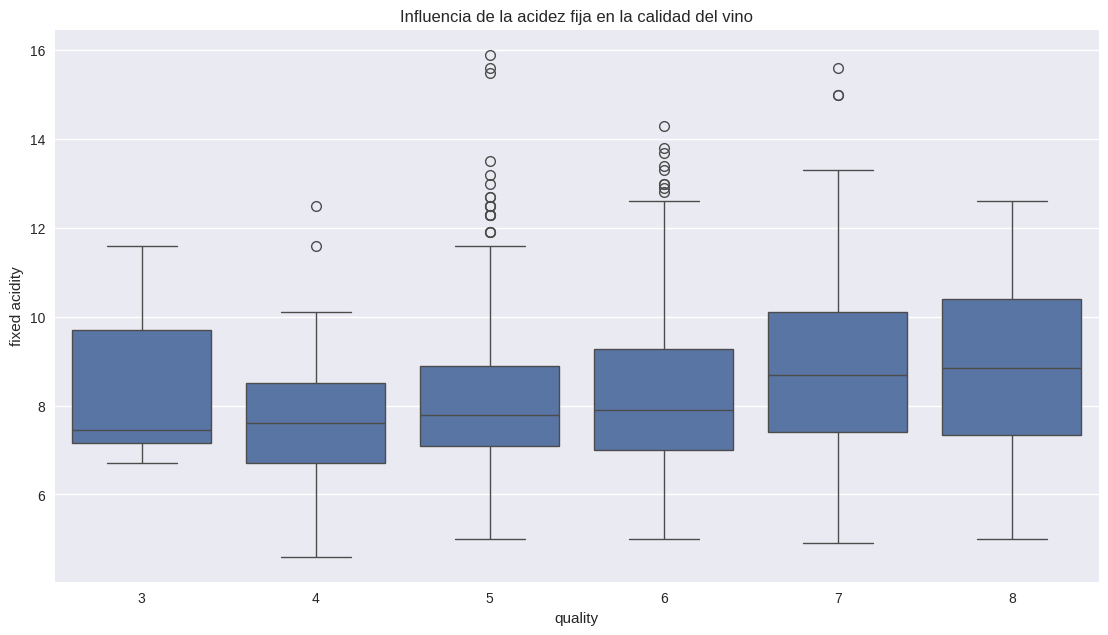

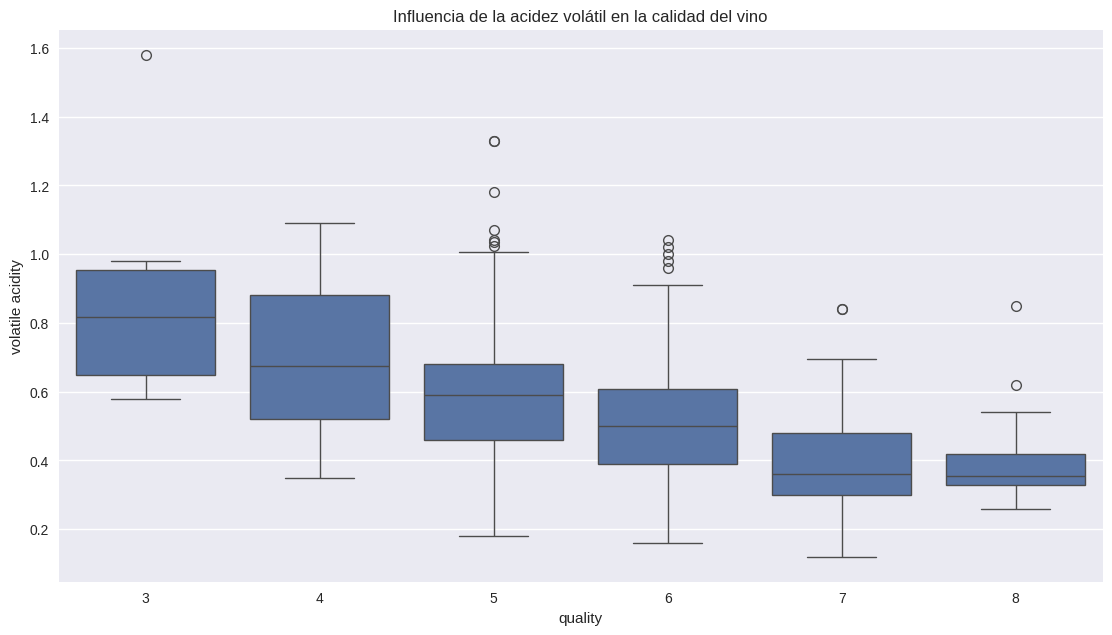

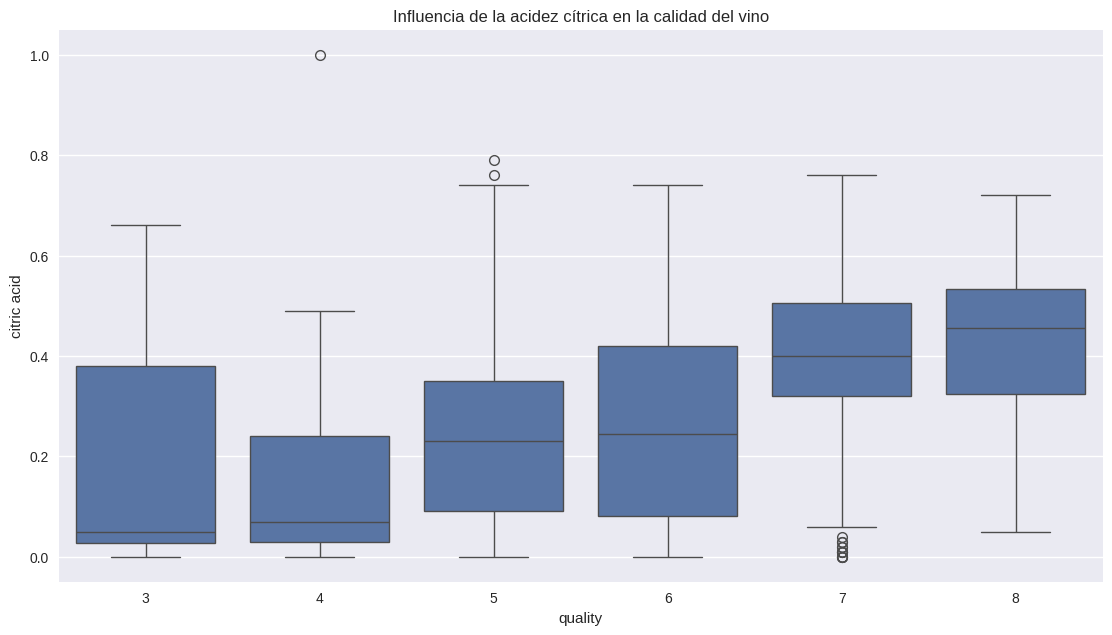

In [ ]:
# Boxplot para la acidez fija
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='fixed acidity', data=df_archivo)
plt.title('Influencia de la acidez fija en la calidad del vino')
plt.show()

# Boxplot para la acidez volátil
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='volatile acidity', data=df_archivo)
plt.title('Influencia de la acidez volátil en la calidad del vino')
plt.show()

# Boxplot para la acidez cítrica
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='citric acid', data=df_archivo)
plt.title('Influencia de la acidez cítrica en la calidad del vino')
plt.show()

***Análisis de los gráficos***

Se expone que los tres bloques de código generan boxplots para visualizar la distribución de tres características diferentes ('fixed acidity', 'volatile acidity' y 'citric acid') según los diferentes niveles de calidad del vino. Los boxplots muestran la mediana, los cuartiles y los valores atípicos, lo que permite comparar la distribución de cada característica en diferentes niveles de calidad del vino de manera efectiva.

Se puede observar a partir de esta graficación, que la acidez fija es la de mayor impacto frente a la calidad del vino, a partir de las medidas estadísticas que describen el comportamiento de los tres tipos de ácidos en la producción del vino.

En un menor plano, se observa la influencia del ácido cítrico en su relación con la calidad del producto vitivinícola final.





***SCATTER PLOT***

La segunda pregunta indaga sobre si el el pH del vino se relaciona directamente con la calidad del mismo.

Para esta visualización se utilizará un gráfico de dispersión (scatter plot) para analizar la relación entre el pH y la calidad del vino.



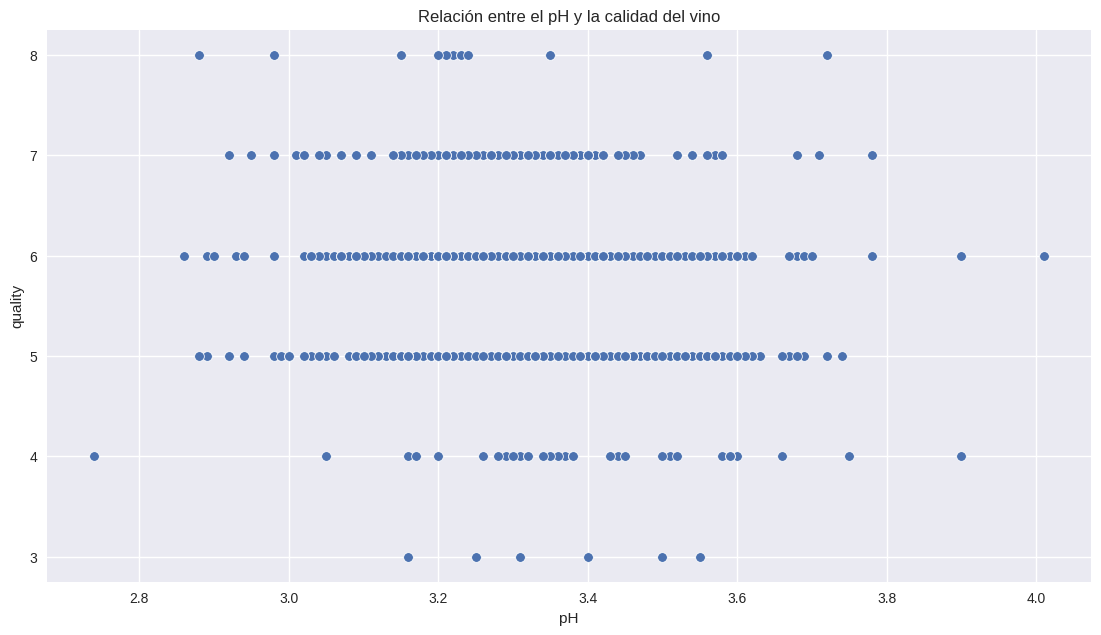

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pH', y='quality', data=df_archivo)
plt.title('Relación entre el pH y la calidad del vino')
plt.show()

***Análisis del gráfico***

Esta visualización generada desde un scatterplot, muestra la relación entre el pH y la calidad del vino. Cada punto en el scatterplot representa una observación en el conjunto de datos, donde la posición del punto en los ejes x e y corresponde al valor de pH y calidad del vino, respectivamente. Este tipo de gráfico es útil para visualizar la relación entre dos variables continuas y para identificar posibles patrones o tendencias en los datos. Por esto mismo, puede observarse la relación directa entre el ph, que determina el nivel de alcalinidad y acidez del vino. La mayoría de los vinos presentan un valor de pH entre 3.0 y 4.0, lo que se correlaciona con una baja calidad del vino en general.

***MATRIZ DE CORRELACIÓN***

Para la pregunta sobre qué tipo de acidez afecta más la calidad del vino, se decide utilizar una matriz de correlación para identificar cuál de los tipos de acidez tiene una correlación más fuerte con la calidad del vino.

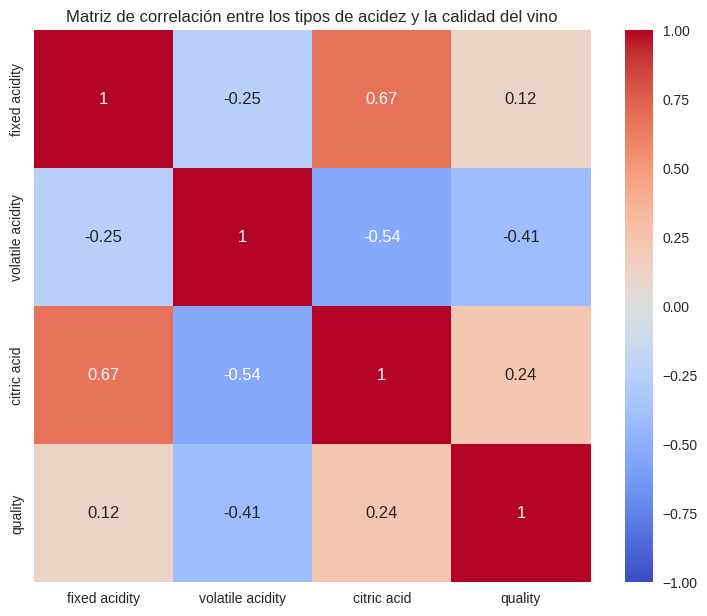

In [ ]:
# Matriz de correlación
correlation_matrix = df_archivo[['fixed acidity', 'volatile acidity', 'citric acid', 'quality']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación entre los tipos de acidez y la calidad del vino')
plt.show()

***Análisis del gráfico***

Este gráfico expone un mapa de calor que visualiza la matriz de correlación entre las características seleccionadas ('fixed acidity', 'volatile acidity', 'citric acid') y la calidad del vino. Cada celda del mapa de calor muestra el valor de correlación entre dos características, donde los colores más oscuros indican una correlación más negativa, los colores más claros indican una correlación más positiva y el blanco representa una correlación neutra. La inclusión de los valores de correlación en las celdas permite una fácil interpretación de la fuerza y la dirección de la relación entre las características. Desde este lugar puede observarse que el impacto positivo sobre la calidad del vino, lo presenta el ácido cítrico en sus concentraciones. Y en una afectación negativa bajo parámetros de calidad, se encuentra el ácido volátil.







***SCATTER PLOT***

Para la última pregunta de análisis, se busca observar si la acidez del vino determina la graduación etílica del mismo.

Para esta graficación se utilizará un gráfico de dispersión para visualizar la relación entre cada tipo de acidez y el contenido de alcohol.

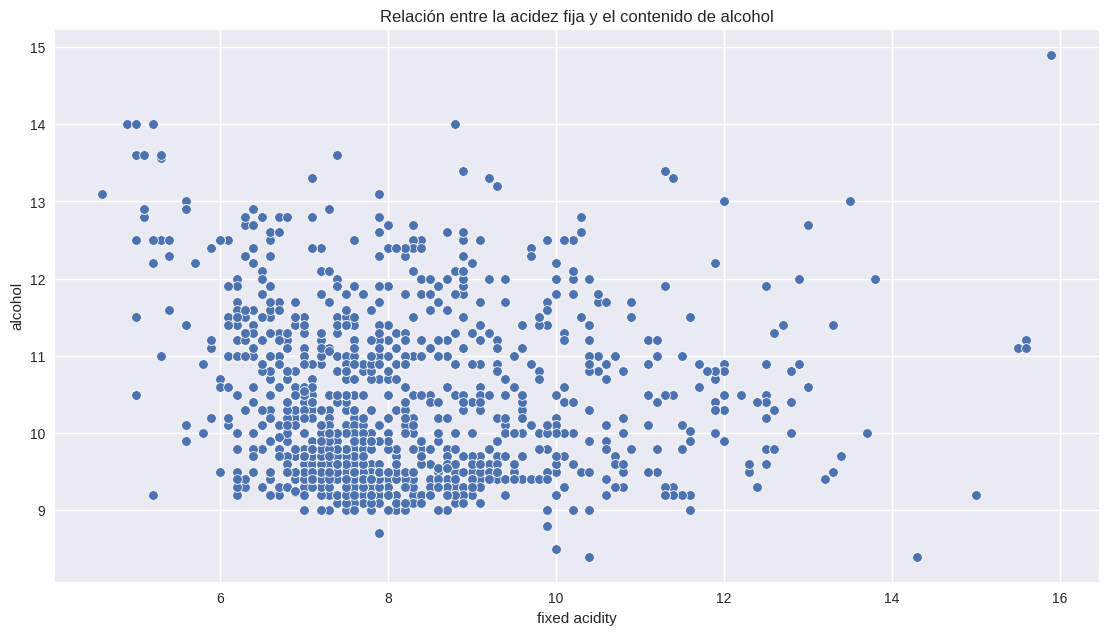

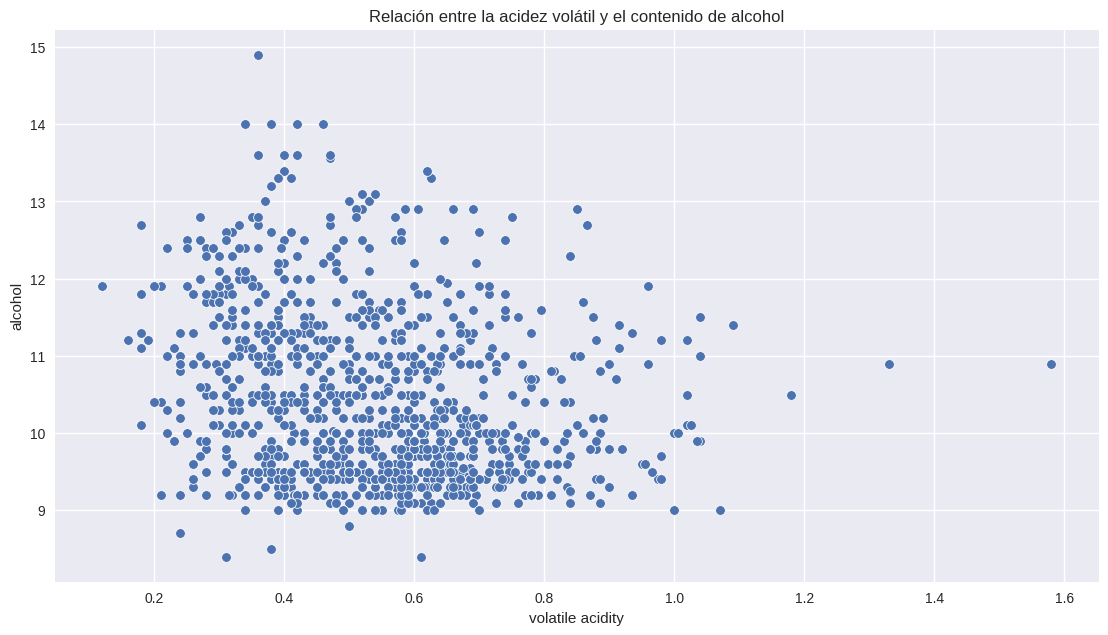

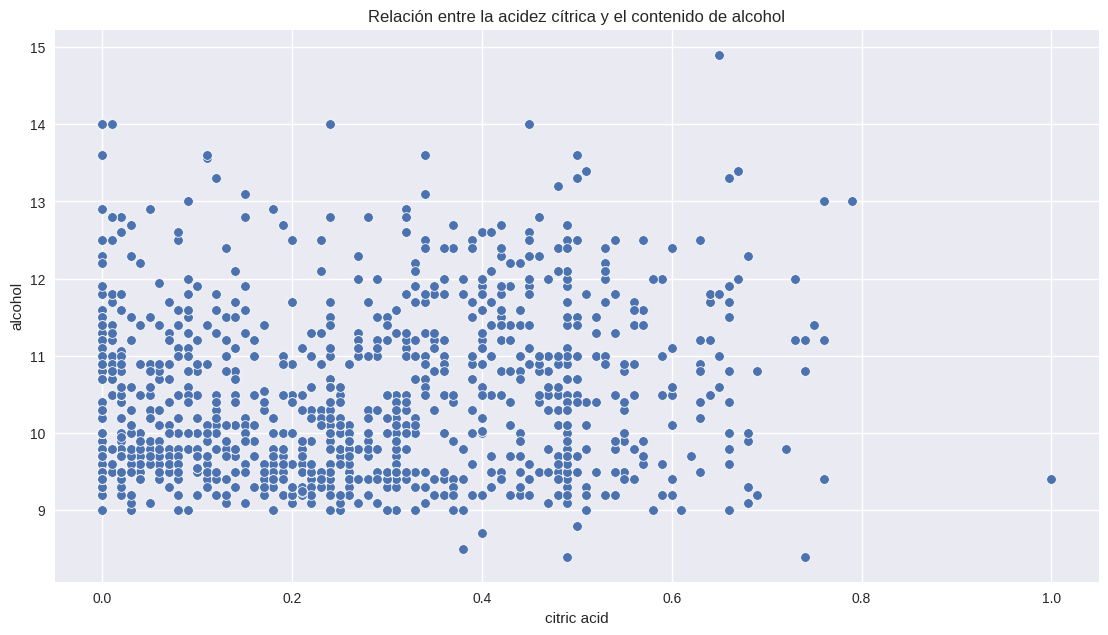

In [ ]:
# Scatter plot para la relación entre acidez fija y contenido de alcohol
plt.figure(figsize=(12, 6))
sns.scatterplot(x='fixed acidity', y='alcohol', data=df_archivo)
plt.title('Relación entre la acidez fija y el contenido de alcohol')
plt.show()

# Scatter plot para la relación entre acidez volátil y contenido de alcohol
plt.figure(figsize=(12, 6))
sns.scatterplot(x='volatile acidity', y='alcohol', data=df_archivo)
plt.title('Relación entre la acidez volátil y el contenido de alcohol')
plt.show()

# Scatter plot para la relación entre acidez cítrica y contenido de alcohol
plt.figure(figsize=(12, 6))
sns.scatterplot(x='citric acid', y='alcohol', data=df_archivo)
plt.title('Relación entre la acidez cítrica y el contenido de alcohol')
plt.show()

***Análisis de los gráficos***

Estos tres bloques de código generan scatterplots que muestran la relación entre la acidez fija, volátil y cítrica y el contenido de alcohol en el vino. Cada punto en los scatterplots representa una observación en el conjunto de datos, donde la posición del punto en los ejes x e y corresponde al valor de la acidez y el contenido de alcohol, respectivamente. Estos gráficos evidencian la plausible identificación de posibles asociaciones entre las características de acidez fija, acidez volátil y ácido cítrico en el vino. Lo que se evidencia es que los niveles de acidez no afectan significativamente en la concentración etílica en el vino.

# ANÁLISIS

La acidez es un factor crucial en la calidad del vino y afecta diversos aspectos de su sabor, aroma, estructura y capacidad de envejecimiento. Por esto mismo es que se plantea la necesidad de analizar los niveles de acidificación en el vino en búsqueda de una mejor calidad del producto final.

*Influencia de la acidez en la calidad del vino:*

La acidez contribuye a la frescura y viveza del vino, equilibrando su sabor y proporcionando una sensación de "chispa" en el paladar. Una acidez adecuada puede realzar los sabores frutales y mejorar la percepción del vino. Por esto mismo, se puede aseverar que la acidez fija es el componente de mayor impacto que interviene en el vino, afectando a la calidad, desde su sabor, aroma y textura entre otras características.
Por otro lado, la acidez actúa como conservante natural, ayudando a mantener la estabilidad microbiológica y protegiendo el vino contra la oxidación prematura. Por esto mismo, también es importante mantener los niveles adecuados de acidez del vino.

*Relación entre el pH del vino y su calidad*

Si bien el pH del vino está relacionado con su acidez, no es el único factor que determina su calidad. Un pH más bajo (más ácido) generalmente se asocia con vinos frescos y vivaces, pero otros aspectos como el equilibrio de sabores, la intensidad aromática, la estructura tánica y la complejidad también son cruciales para la calidad del vino.
Por lo tanto, aunque un pH más bajo puede ser indicativo de una buena acidez y frescura, no garantiza por sí solo la calidad del vino. Esto es observado en los gráficos de visualización, donde el ácido cítrico es el que presenta menores niveles y se relaciona con una mejor calidad del mismo. Pero esto no es determinante como se expuso.

*Tipo de acidez que afecta más la calidad del vino*

En general, desde los antecedentes frente a la acidez del vino y su calidad, las tres principales ácidos presentes en el vino son el ácido tartárico, el ácido málico y el ácido cítrico. Cada uno contribuye de manera diferente a la percepción de la acidez en el vino.
El ácido tartárico es el ácido principal en la uva y suele ser deseable en el vino, ya que contribuye a la estructura y al equilibrio.
El ácido málico, presente en las uvas verdes, puede aportar frescura pero en exceso puede dar una sensación de acidez áspera.
El ácido cítrico, aunque presente en menor medida, puede agregar complejidad y frescura al vino.
El equilibrio entre estos ácidos es esencial para la calidad general del vino.

*La acidez del vino determina la graduación alcohólica*

En cuanto a esta premisa, se puede observar que la acidez del vino no determina directamente su graduación alcohólica, pero si con otros factores como vimos expuestos en los gráficos. La graduación alcohólica del vino está influenciada principalmente por el contenido de azúcar en las uvas y el proceso de fermentación. La acidez puede influir en el equilibrio y la percepción del alcohol en el vino, pero no determina su nivel de alcohol.
Para concluir, la acidez es un componente crucial en la calidad del vino, pero su influencia y relación con otros aspectos son complejas y multifacéticas. El equilibrio entre los diferentes ácidos y otros componentes es fundamental para obtener un vino de alta calidad.

# MODELADO Y PREDICCIÓN

Para esta etapa de análisis y validación, se utilizará un árbol de decisión para predecir la calidad del vino en función de sus características, se utilizará una biblioteca de aprendizaje automático scikit-learn.

Se utilizará la biblioteca scikit-learn para cargar los datos desde el archivo CSV, dividir los datos en conjuntos de entrenamiento y prueba, crear un clasificador de árbol de decisión, entrenar el modelo, predecir en el conjunto de prueba, calcular la precisión del modelo y mostrar la matriz de confusión. Finalmente, visualiza el árbol de decisión generado.

Para construir y evaluar el modelo de análisis, los datos se dividirán en conjuntos de entrenamiento y prueba (tanto X como Y). La proporción elegida es del 60% para entrenamiento y el 30% para prueba. Esta división asegura que el modelo tenga suficiente información para aprender y también permite evaluar su desempeño en datos no vistos.



El código crea un SimpleImputer para reemplazar los valores faltantes con la media de cada columna. Primero, ajusta el imputer al conjunto de entrenamiento (X_train) y transforma los datos, reemplazando los valores faltantes con las medias correspondientes. Luego, aplica esta transformación al conjunto de prueba (X_test), utilizando las medias calculadas del conjunto de entrenamiento. Esto garantiza una imputación consistente y evita sesgos introducidos por el conjunto de prueba. Los resultados son X_train_imputed y X_test_imputed, donde los valores faltantes han sido reemplazados.

Precisión del modelo: 0.5714285714285714
Matriz de confusión:
[[ 0  0  1  0  0  0]
 [ 0  2  7  3  0  0]
 [ 2  9 97 44  4  0]
 [ 1  4 37 72 13  1]
 [ 0  0  5  8 25  1]
 [ 0  0  2  2  3  0]]


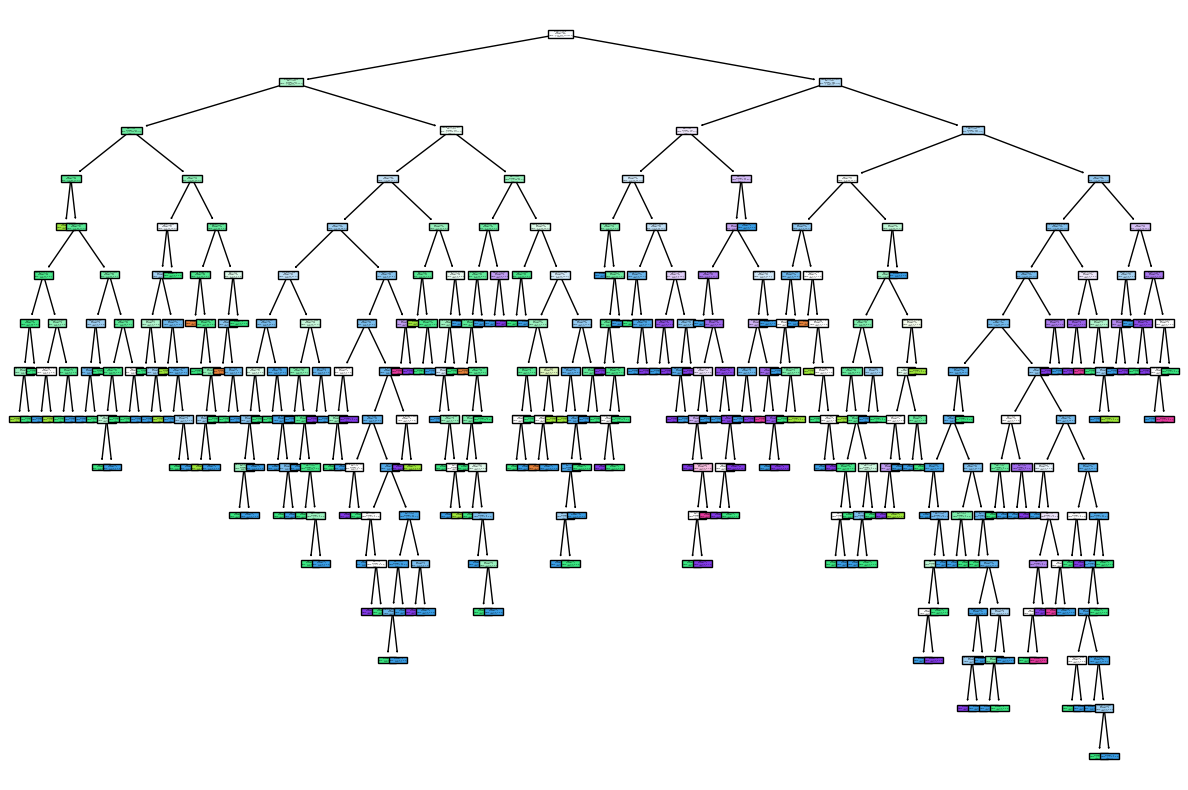

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
url = "https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv"
data = pd.read_csv(url)

# Se seleciona la variable quality
# Características (X) y la variable objetivo (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

# Crear el clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=60)

# Entrenar el modelo solo en el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar el árbol de decisión
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['3','4','5','6','7','8'])
plt.show()

Precisión del modelo

En cuanto a la precisión del modelo se puede observar que se encuentra en un nivel intermedio de validación y confiabilidad, frente a la predección de la calidad del vino en el conjunto de datos de prueba.

Esta precisión del mismo arroja un 0.57, se calcula dividiendo el número de predicciones correctas entre el número total de predicciones. En este caso, la precisión se imprime en la consola y te indica qué tan bien el modelo está funcionando. Cuanto más alto sea el valor, mejor será la capacidad predictiva del modelo. Aquí se evidencia el bajo nivel de validación del mismo. Por lo cual se sugiere trabajar con otros enfoques frente a esta problemática.

La matriz de confusión muestra las predicciones del modelo en comparación con los valores reales en el conjunto de prueba. La matriz de confusión tiene filas y columnas que representan las etiquetas reales y predichas, respectivamente. En este caso, las filas y columnas representan los valores de calidad del vino (en una escala del 3 al 8). Cada celda de la matriz muestra cuántas instancias pertenecen a una cierta combinación de valores reales y predichos. Esto te permite evaluar cómo el modelo está clasificando las muestras en diferentes clases de calidad de vino. En esta matriz se evidencian valores atípicos que complejizan el modelo en sí.

En la visualización del árbol de decisión que permite entender cómo el modelo toma decisiones basadas en las características de entrada para predecir la calidad del vino. Cada nodo del árbol representa una característica y una regla de decisión, y las hojas del árbol representan las predicciones. La visualización te permite seguir las diferentes ramas del árbol para entender cómo el modelo divide los datos en diferentes grupos basados en las características. Esto puede darte información sobre qué características son las más importantes para predecir la calidad del vino y cómo se relacionan entre sí.

La interpretación de estos resultados expone la importancia de considerar tanto la precisión del modelo como la estructura del árbol de decisión y la distribución de las predicciones en la matriz de confusión para evaluar la calidad y el rendimiento del modelo.





***SVM***

El propósito del modelo SVM en este contexto es clasificar los componentes del vino, específicamente el ácido fijo, ácido volátil y ácido citrico, en relación con la calidad del vino. El modelo encuentra el hiperplano que mejor separa estas dos clases, maximizando la distancia (margen) entre los puntos de datos más cercanos de cada dimensión de análisis. El SVM es especialmente efectivo cuando el número de dimensiones es mayor que el número de muestras. Versatilidad: Utiliza diferentes funciones de kernel (lineal, polinómico, RBF, etc.) para crear fronteras de decisión no lineales. Robustez: Es menos propenso a sobreajustarse cuando se utiliza correctamente, gracias al margen máximo que crea entre las clases. Eficiencia Computacional: Puede ser ineficiente en términos de tiempo y memoria cuando se trabaja con grandes conjuntos de datos. Ajuste de Hiperparámetros: Requiere un ajuste cuidadoso de los hiperparámetros, como el parámetro de penalización C y los parámetros del kernel.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Cargar los datos desde el archivo CSV
url = "https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv"
df = pd.read_csv(url)

# Separar las características (X) y la variable objetivo (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)

# Calcular la precisión del modelo
acc = svm.score(X_test_scaled, y_test)
print("Precisión del modelo SVM:", acc)


Precisión del modelo SVM: 0.6550218340611353


In [ ]:
print('accuracy =', round(acc * 100, 2), '%')

accuracy = 65.5 %


Este modelo carga un conjunto de datos de vinos, divide los datos en conjuntos de entrenamiento y prueba, escala las características, entrena un modelo SVM y evalúa su precisión en los datos de prueba.

Este modelo SVM entrenado proporciona una importante herramienta para la validación del modelo. La precisión obtenida, con un accuracy del 65.5%, deja en evidencia la acercada validación del modelo implementado para generalizar en datos de prueba. El grado de precisión del modelo indica que el SVM ha logrado acercarse en la identificación acertada en la relación de la calidad del vino y los niveles de acidez proporcinados en datos. Esto es taxativo a la hora de planificar la producción vitivinícola de calidad de importación.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Cargar los datos desde el archivo CSV
url = "https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv"
df = pd.read_csv(url)

# Separar las características (X) y la variable objetivo (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el valor de k y crear el clasificador KNN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo KNN
knn.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = knn.predict(X_test_scaled)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN:", accuracy)


Precisión del modelo KNN: 0.5589519650655022


In [ ]:
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 55.90%


Este modelo primero carga el conjunto de datos desde la URL proporcionada, luego divide los datos en conjuntos de entrenamiento y prueba, escala las características para asegurarse de que estén en la misma escala, inicializa y entrena un modelo de regresión logística, y finalmente calcula la precisión del modelo en los datos de prueba.

El modelo KNN ha sido entrenado para clasificar la relación entre la acidificación y la calidad del vino. La precisión obtenida en los datos de prueba es del 55.90%. Esto indica que el modelo es deficiente en clasificar correctamente la relación directa de la acidez y la calidad.

# CONCLUSIONES Y RECOMENDACIONES

Se puede concluir, a prtir del objetivo general de este trabajo, de conocer de qué manera influye los niveles de acidificación en la producción del vino para la obtención de un vino de mayor calidad, las siguientes deducciones.

SVM (Support Vector Machine) El modelo SVM alcanzó una precisión del 65.9%, demostrando su capacidad para clasificar correctamente la satisfacción del cliente. SVM es especialmente útil para problemas de clasificación con datos de alta dimensionalidad y relaciones no lineales entre características.

KNN (K-Nearest Neighbors) El modelo KNN con k=5 obtuvo una precisión del 55.9%. Este modelo es intuitivo y fácil de implementar, y funciona bien cuando la relación entre las características y las clases es compleja y no lineal. Sin embargo, puede ser computacionalmente costoso para grandes conjuntos de datos.

El grado de precisión del modelo KNN sugiere que este enfoque es efectivo para este tipo de problema de clasificación. El KNN es especialmente útil en situaciones donde las relaciones entre las características y las clases no son lineales y se basan en la proximidad de las observaciones en el espacio de características.

En conclusión, cada modelo tiene sus propias ventajas y limitaciones. Para este análisis específico de la calidad del vino y sus niveles y tipo de acidez, marcan un camino distinto a seguir. No obstante, la selección del modelo puede depender de otros factores, como la necesidad de interpretabilidad, los recursos computacionales disponibles y la naturaleza del problema específico.

Como análisis final, se puede observar el gran impacto de la acidificación en la producción del vino afectando su calidad final.
Es necesario trabajar sobre el modelamiento, entrenamiento y modelos para la implementación de este tipo de problemas a analizar. como se expuso antes.